In [2]:
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True

/tmp/yes/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [18]:
# 0: id
# 1: 8
# 2: 8
# 3: 10
# 4: \bar 10

d={'1':1, '8':3, '10':1, '10b':1}

R88_8=np.array([[-1j,0],[0,1j]])
R88={'1':np.array([[-1]]), '8':R88_8, '10':np.array([[-1]]), '10b':np.array([[-1]])}
F888={}
F888['1']=np.array([[1,0],[0,1]])
F888['8']=np.array([[-1/2,0,0,1/2],\
           [0,1/2,1/2,0],\
           [0,1/2,1/2,0],\
           [1/2,0,0,-1/2]])
F888['10']=np.array([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])
F888['10b']=np.array([[-1/2,sqrt(3)/2],[-sqrt(3)/2,-1/2]])

# print(F888)
# p=np.array([[.2,.1],[.1,.8]])
p=np.zeros((2,2))

np.random.seed(1)
Nrep=100
LN1=np.zeros(Nrep)
for i_r in range(0,Nrep):
    p[0,0]=np.random.randn(1)
    p[1,1]=1-p[0,0]
    
    M={}
    neg=0
    for c in ['1','8','10','10b']:
        if c=='8':
            M[c]=np.array([[0,0],[0,0]],dtype=np.complex64)
            nu_m=2
        else:
            M[c]= np.array([[0]],dtype=np.complex64)
            nu_m=1
        for nu in range(0,nu_m):
            for nup in range(0,nu_m):
                for s in range(0,2):
                    for sp in range(0,nu_m):
                        for mu in range(0,2):
                            for mup in range(0,2):
                                M[c][nu,nup]+= p[mu,mup]* R88_8[mu,s] * F888[c][s+2*nu,mup+2*sp]*R88[c][sp,nup]
                    
        if c=='8':
            Mh=np.dot(np.matrix(M[c]).H,M[c])
            neg += d[c]/d['8']*np.sum(np.sqrt(np.linalg.eigvalsh(Mh)))
        else:
            neg += d[c]/d['8']*np.abs(M[c])
    LN1[i_r]= np.log(neg)
    
# print(M)

In [11]:
# 0: id
# 1: 8
# 2: 8
# 3: 10
# 4: \bar 10
def rand_density(n):
    l=np.random.rand(n)
    r1=np.diag(l)/np.sum(l)
    X= (np.random.randn(n,n)+1j*np.random.randn(n,n) )/sqrt(2)
    Q,R= np.linalg.qr(X)
    R = np.diag(np.diag(R)/np.abs(np.diag(R)))
    U = np.dot(Q,R)
    return np.dot(U, np.dot(r1,np.matrix(U).H))


d={'1':1, '8':3, '10':1, '10b':1}

R88_8=np.array([[-1j,0],[0,1j]])
R88={'1':np.array([[-1]]), '8':R88_8, '10':np.array([[-1]]), '10b':np.array([[-1]])}
F888={}
F888['1']=np.array([[1,0],[0,1]])
F888['8']=np.array([[-1/2,0,0,1/2],\
           [0,1/2,1/2,0],\
           [0,1/2,1/2,0],\
           [1/2,0,0,-1/2]])
F888['10']=np.array([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])
F888['10b']=np.array([[-1/2,sqrt(3)/2],[-sqrt(3)/2,-1/2]])

# print(F888)
# p=np.array([[.2,.1],[.1,.8]])
p=np.zeros((2,2))

# np.random.seed(1)
Nrep=100
LN2=np.zeros(Nrep)
for i_r in range(0,Nrep):
#     p[0,0]=np.random.randn(1)
#     p[1,1]=1-p[0,0]
    
    p=rand_density(2)
    
    M={}
    neg=0
    for c in ['1','8','10','10b']:
        if c=='8':
            M[c]=np.array([[0,0],[0,0]],dtype=np.complex64)
            nu_m=2
        else:
            M[c]= np.array([[0]],dtype=np.complex64)
            nu_m=1
        for nu in range(0,nu_m):
            for nup in range(0,nu_m):
                for s in range(0,2):
                        for mu in range(0,2):
                            for mup in range(0,2):
                                M[c][nu,nup]+= p[mu,mup]* R88_8[mu,s] * F888[c][s+2*nu,mup+2*nup]
                    
        if c=='8':
            Mh=np.dot(np.matrix(M[c]).H,M[c])
            neg += d[c]/d['8']*np.sum(np.sqrt(np.linalg.eigvalsh(Mh)))
        else:
            neg += d[c]/d['8']*np.abs(M[c])
    LN2[i_r]= np.log(neg)
    
# print(M)

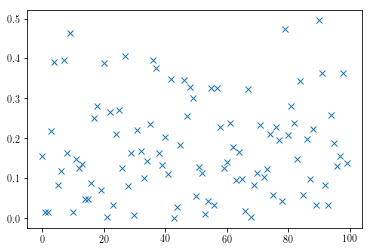

In [12]:
plt.figure()
# plt.plot(LN1,'o')
plt.plot(LN2,'x')
plt.show()

In [16]:
rho=rand_density(2)
print(np.linalg.eigvalsh(rho))

[0.46989203 0.53010797]
